In [ ]:
Name:Awez Sheikh
Roll No.: 32
Batch: A2
Practical 6

Write programs to apply 2D transformations such as Negative, Logarithmic, Gamma, Affine, and Cropping on images to simulate real-world applications like enhancing low-light photos, correcting geometric distortions, and extracting regions of interest in satellite imagery

In [27]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img=cv2.imread("/content/Satellite-picture-.png")
print(img.shape)
print(img)

(528, 692, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


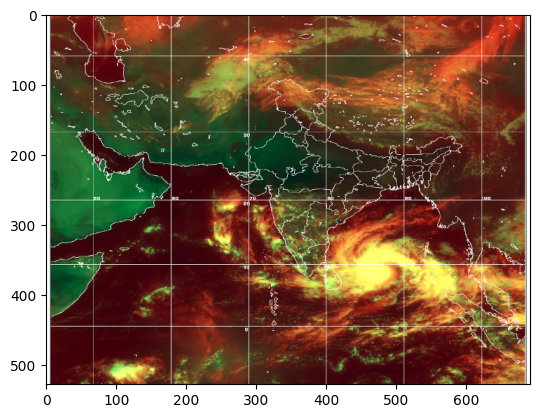

In [28]:
plt.imshow(img)

528 692


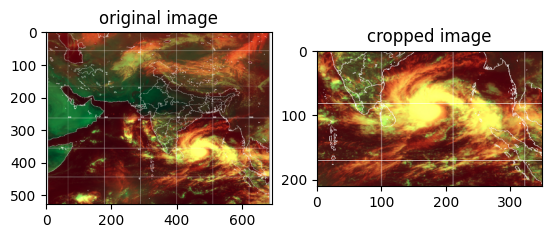

In [29]:
#cropping hurricane from the image
y,x,_=img.shape
print(y,x)
y,x,w,h=275,300,350,210
cropped_image=img[y:y+h,x:x+w]
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("cropped image")
plt.imshow(cropped_image)

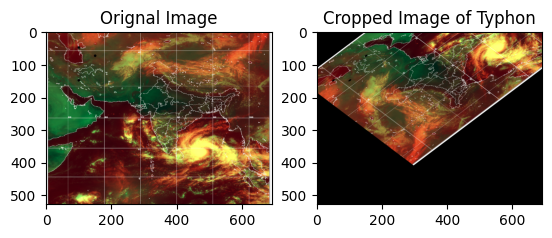

In [33]:
# Shearing operation
rows, cols, channels = img.shape

initial_points = np.float32([[100,50],[100,150],[150,75]])
new_points = np.float32([[50,150],[150, 75],[100,150]])

drawn_points_image = cv2.circle(img, (100,50), radius=0, color=(0, 0, 0), thickness=5)
drawn_points_image = cv2.circle(img, (100,150), radius=0, color=(0, 0, 0), thickness=5)
drawn_points_image = cv2.circle(img, (150,75), radius=0, color=(0, 0, 0), thickness=5)

shearing_matrix = cv2.getAffineTransform(initial_points, new_points)
sheared_matrix = cv2.warpAffine(img, shearing_matrix, (cols, rows))

plt.subplot(1, 2, 1)
plt.title("Orignal Image")
plt.imshow(drawn_points_image)
plt.subplot(1, 2, 2)
plt.title("Cropped Image of Typhon")
plt.imshow(sheared_matrix)


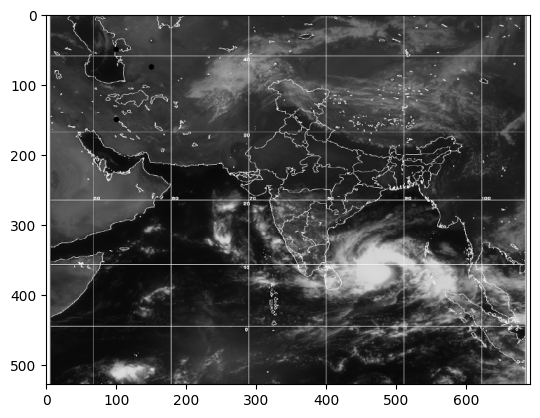

In [34]:
# Apply affine transformation
matrix = cv2.getAffineTransform(initial_points,new_points)
affine_image = cv2.warpAffine(img, matrix, (cols,rows))

# brightness section - LOG
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')

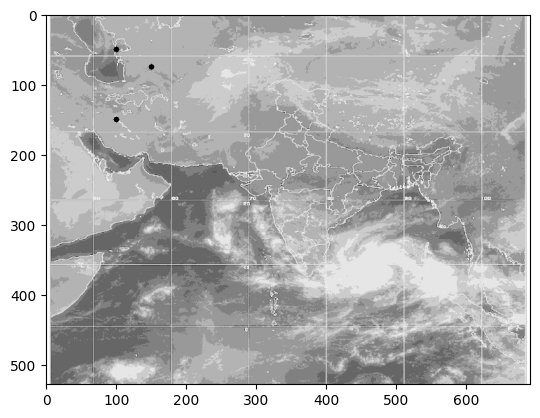

In [35]:
# apply logarithmic transformation
c = 10/np.log(1+np.max(gray_image))
log_image = c*np.log(1+gray_image.astype(np.float32))
log_image = np.uint8(log_image)
plt.imshow(log_image,cmap='gray')

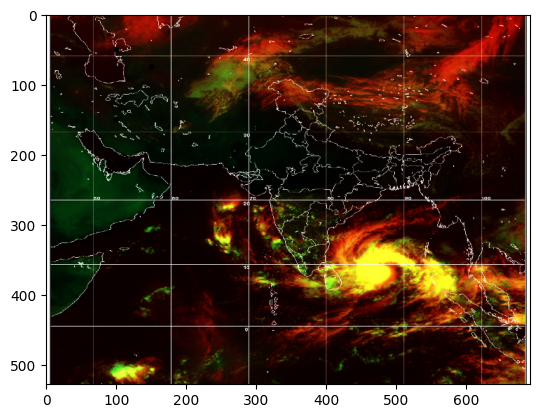

In [36]:
# gamma

#define gamma value
gamma = 2.2
gamma_corrected = np.power(img / 255.0, gamma) * 255
gamma_corrected = np.uint8(gamma_corrected)
plt.imshow(gamma_corrected)


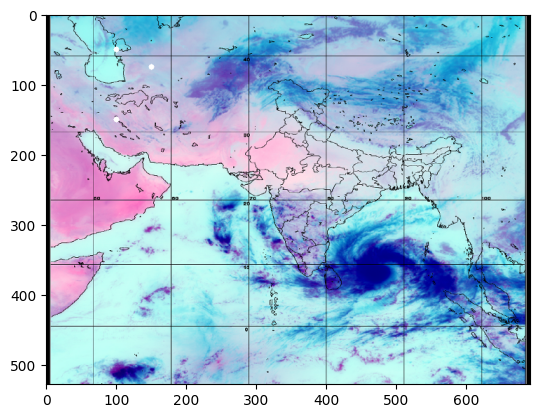

In [37]:
# negative
# apply negative transformation
negative_image = 255-img
plt.imshow(negative_image)
